# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Consider a company that manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create curated manufacting data
n_types = 3 # number of distinct product types
n_obs = 10000 # total number of observations

# Type of the product per observation
productType <- round(sample(1:n_types, n_obs, replace = TRUE))
productType <- paste("P", productType, sep="")

# Number of defects per observation
defects <- round(abs(rnorm(n_obs, mean = 800, sd = 500)))

# Quantity of the product per observation
quantity <- 1000*defects + round(abs(rnorm(n_obs, mean = 50000, sd = 100000)))

# Manufacturing location per observation
location <- sample(c("Germany", "France", "Spain", "Italy"), n_obs, replace = TRUE, prob = c(0.3, 0.4, 0.2, 0.1))

# Dataframe of manufacturing data
df <- data.frame("ProductType" = productType, "Quantity" = quantity, "Defects" = defects, "Location" = location)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,ProductType,Quantity,Defects,Location
,<fct>,<dbl>,<dbl>,<fct>
5727,P1,531682,483,France
5592,P1,1419008,1325,Spain
7279,P1,828618,724,Spain
4999,P1,1455811,1413,Germany
6934,P3,824686,617,Germany
2678,P1,598495,495,Germany
2856,P3,1230158,1132,France
8346,P2,822415,781,Spain
7255,P3,403987,392,France


    
Pareto chart analysis for defectCount
       Frequency   Cum.Freq.  Percentage Cum.Percent.
  P1 31933.00000 31933.00000    40.36021     40.36021
  P2 27730.00000 59663.00000    35.04803     75.40824
  P3 19457.00000 79120.00000    24.59176    100.00000

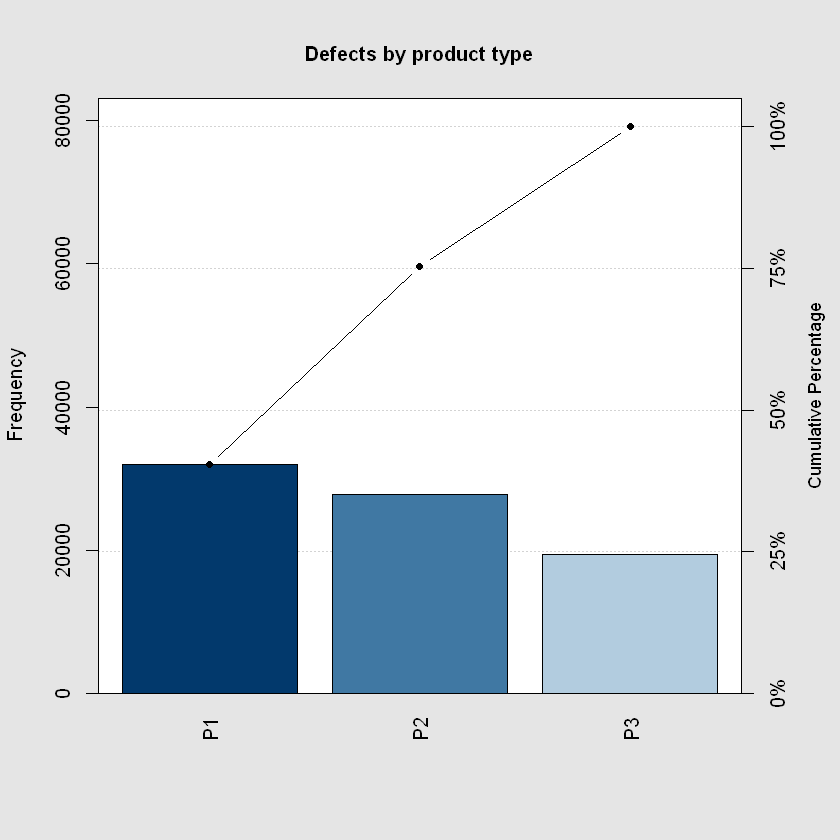

In [4]:
# Pareto chart
aggregatedData <- aggregate(myData$Defects, by=list(ProductType=myData$ProductType), FUN=sum)
names(aggregatedData)[2] <- "Defects"
defectCount <- aggregatedData$Defects
names(defectCount) <- aggregatedData$ProductType
pareto.chart(defectCount, main="Defects by product type")

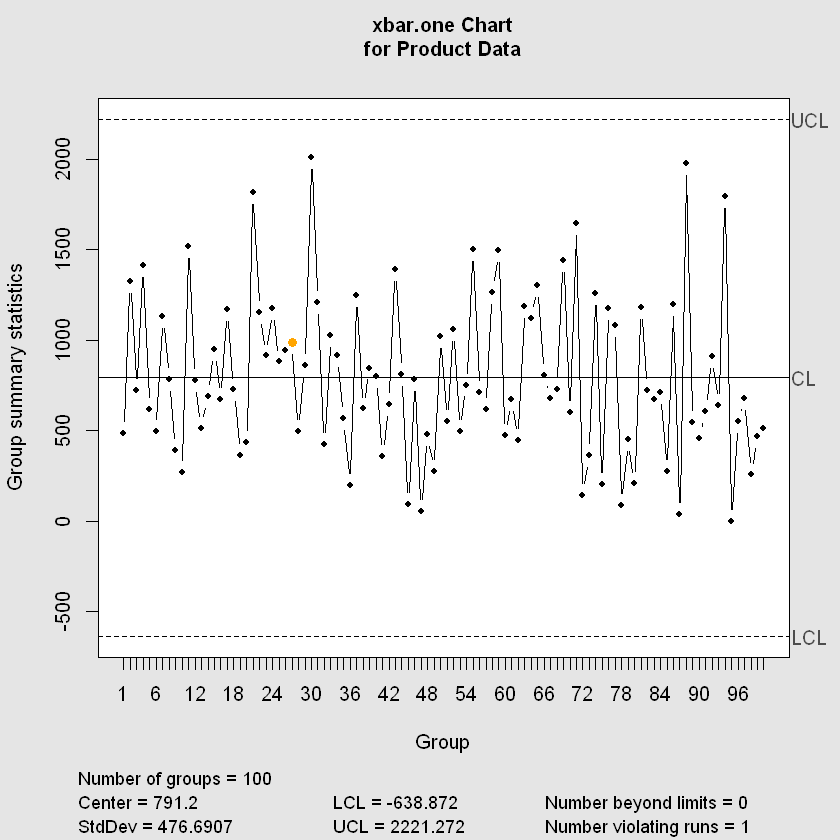

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 791.2           LSL = 200
       StdDev = 476.7           USL = 600

Capability indices:

        Value      2.5%    97.5%
Cp     0.1399   0.12039   0.1593
Cp_l   0.4134   0.34032   0.4865
Cp_u  -0.1337  -0.07669  -0.1907
Cp_k  -0.1337  -0.06577  -0.2016
Cpm    0.1081   0.09039   0.1258

Exp<LSL 11%	 Obs<LSL 7%
Exp>USL 66%	 Obs>USL 64%


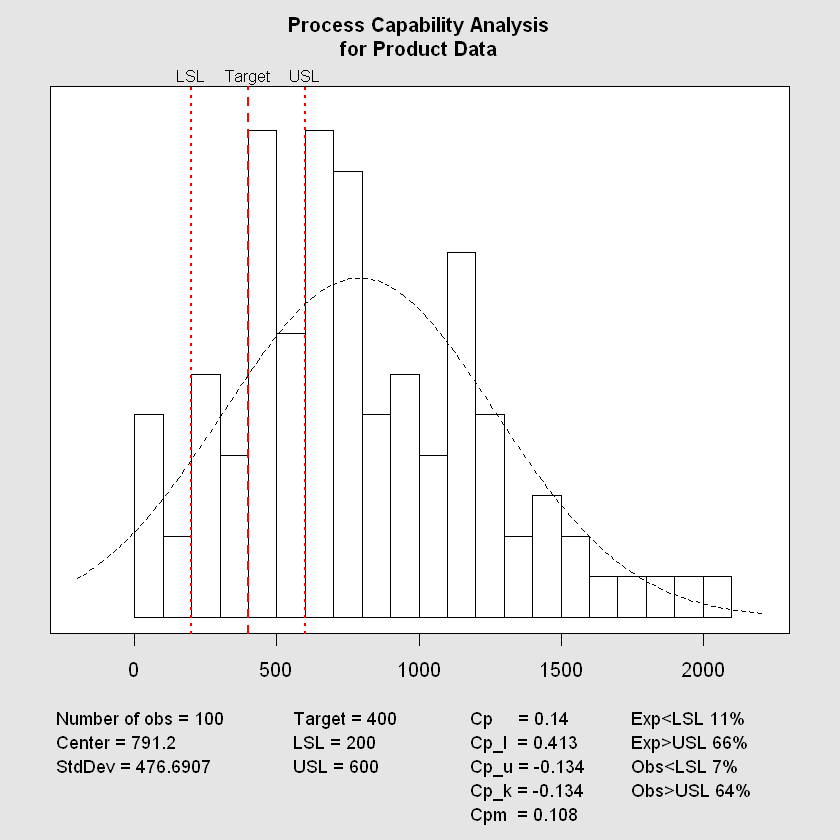

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

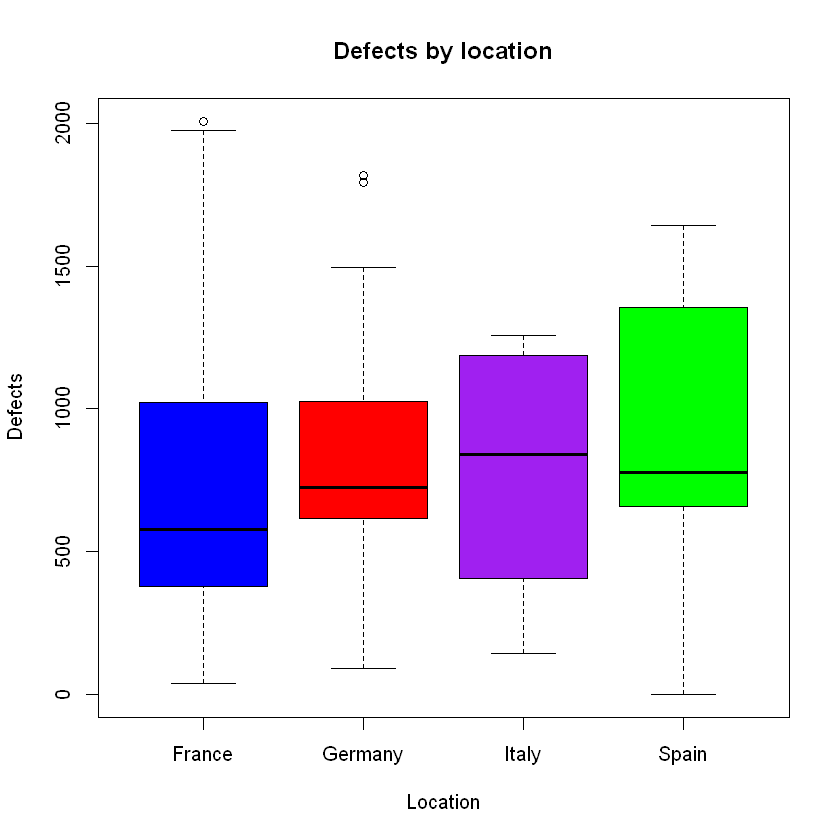

In [7]:
# Boxplot of defects by location
boxplot(data=myData, Defects ~ Location, 
        col = c("blue", "red", "purple", "green"),
        ylab = "Defects",
        main = "Defects by location")

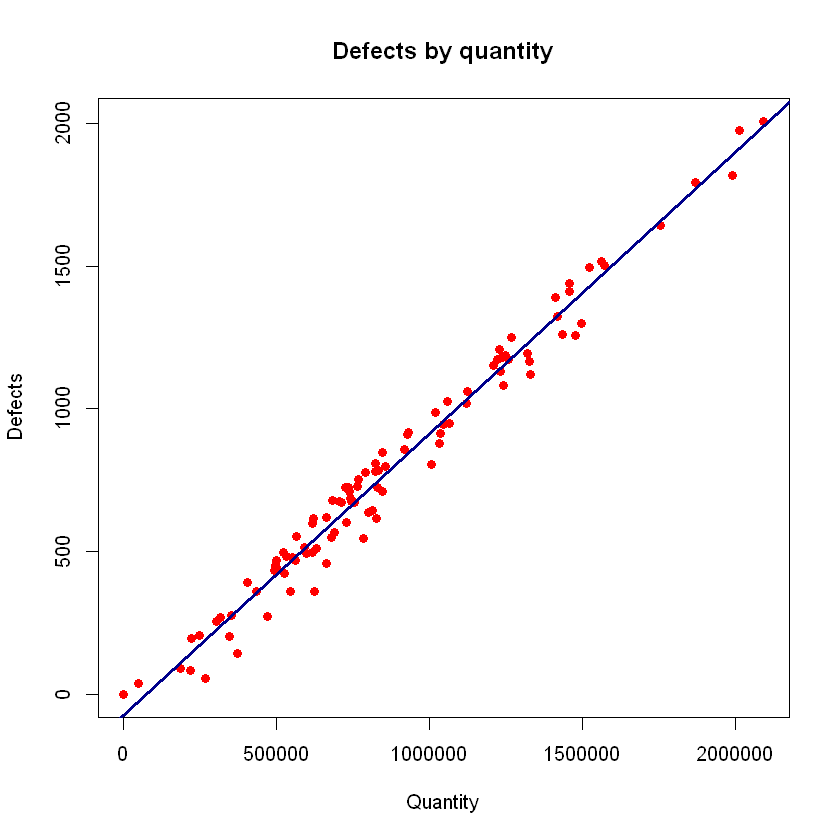

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantity",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

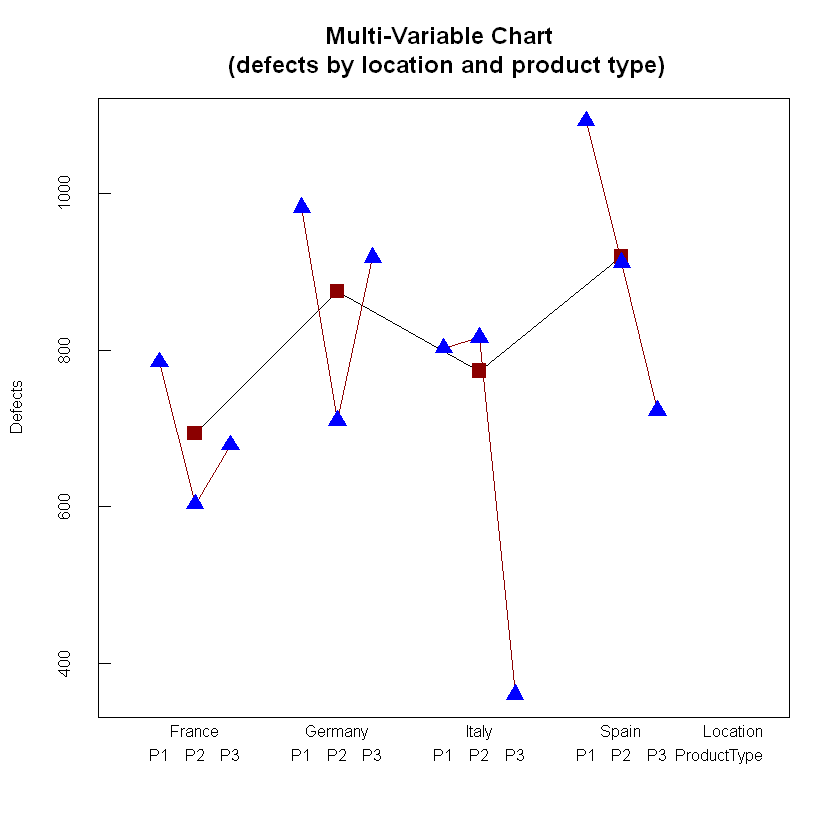

In [9]:
# Multivari chart of defects by location and product type
multivari("Defects",                          # Response 
          "Location", "ProductType",            # Factors  
          data = myData,                      # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 2,
          legend = FALSE,
          cex = 0.8,
          main = "Multi-Variable Chart \n (defects by location and product type)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3   905191  301730   1.571  0.201
Residuals   96 18438017  192063               

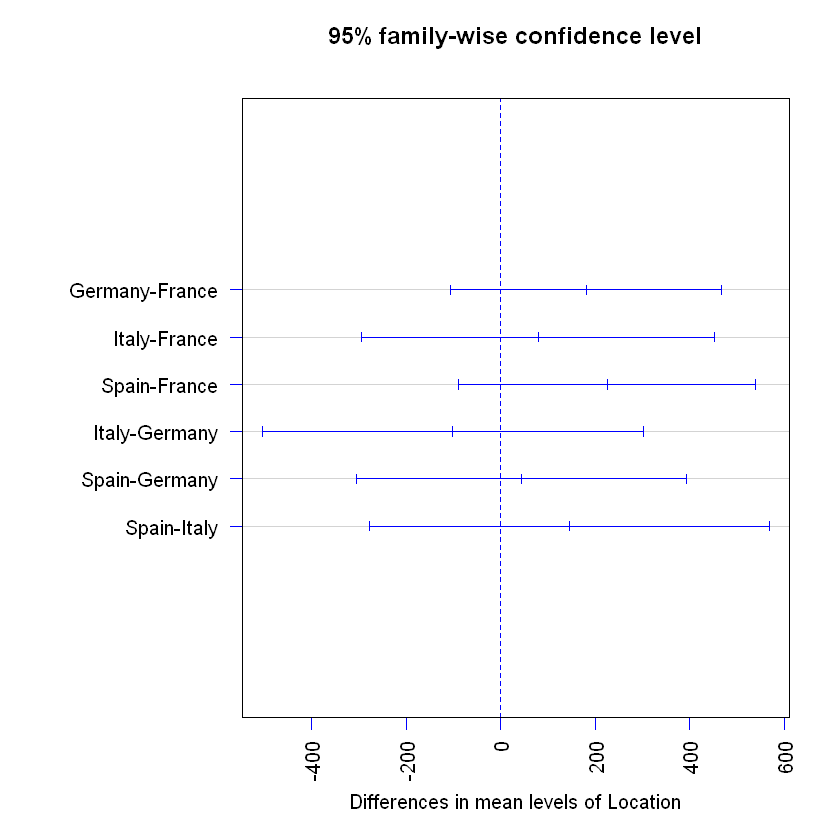

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest